In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from astropy import units as u
from astropy.coordinates import Angle
from copy import deepcopy

In [2]:
path1 = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/'
path2 = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457549/'

In [4]:
uvd1 = UVData()
uvd2 = UVData()

In [5]:
uvd1.read(path1+'lst.2457548.17h42m00s.17h48m00s.uvcRP.drift.uvh5')

In [6]:
uvd2.read(path2+'lst.2457549.17h42m00s.17h48m00s.uvcRP.drift.uvh5')

In [8]:
# Did we even get the same number of time samples?
print(uvd1.Ntimes)
print(uvd2.Ntimes)

34
34


In [10]:
print(uvd1.lst_array.min(), uvd1.lst_array.max())
print(uvd2.lst_array.min(), uvd2.lst_array.max())

4.634099382833135 4.659937886864407
4.6340393837780764 4.659877887010434


In [11]:
lst1 = np.unique(uvd1.lst_array)
lst2 = np.unique(uvd2.lst_array)

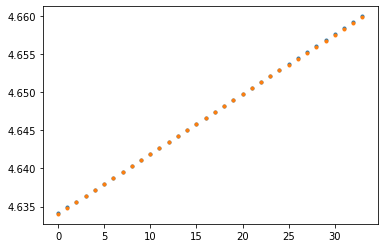

In [14]:
plt.plot(lst1,'.')
plt.plot(lst2,'.')

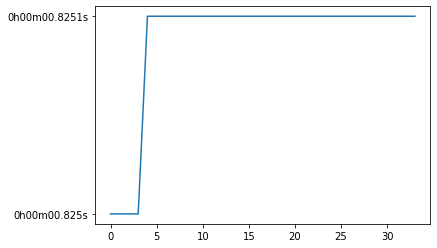

In [18]:
plt.plot(Angle(lst1-lst2, u.rad).to_string(unit=u.hour))

In [19]:
(lst1-lst2)*24./(2.*np.pi)*3600.

array([0.82504623, 0.82504656, 0.8250469 , 0.82504723, 0.82508791,
       0.82508824, 0.82508857, 0.82508891, 0.82508924, 0.82508957,
       0.8250899 , 0.82509024, 0.82509057, 0.8250909 , 0.82509124,
       0.82505123, 0.82505156, 0.82505189, 0.82505222, 0.82505256,
       0.82505289, 0.82505322, 0.82505356, 0.82505389, 0.82505422,
       0.82505455, 0.82505489, 0.82505522, 0.82505555, 0.82505589,
       0.82505622, 0.82505655, 0.82505688, 0.82505722])

In [21]:
# Let's look at those uvws
uvw1 = np.reshape(uvd1.uvw_array, [uvd1.Ntimes, uvd1.Nbls, 3])
uvw2 = np.reshape(uvd2.uvw_array, [uvd2.Ntimes, uvd2.Nbls, 3])

In [23]:
def plot_uvw(uvw):
    for i in np.arange(3):
        plt.imshow(uvw[:,:,i], aspect='auto')
        plt.colorbar()
        plt.show()

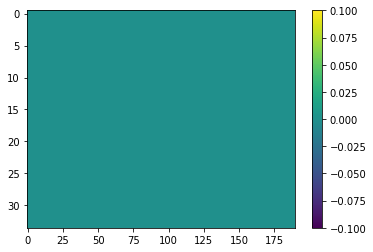

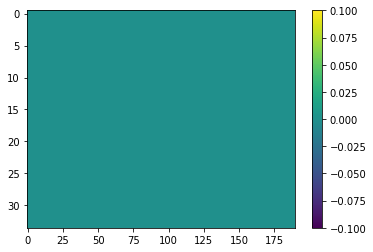

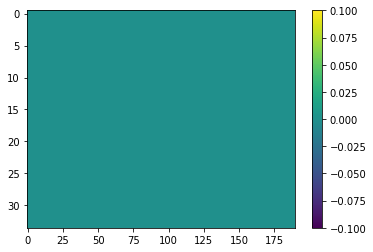

In [26]:
# Cool - in drift mode, really do have identical uvws
plot_uvw(uvw1-uvw2)

In [ ]:
# Now, suppose we phase ...
uvd1_phase = 